In [1]:
import pandas as pd
import pandas as pd
import os
from pathlib import Path
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders
from pyalex import config
from tqdm import tqdm 
import json

In [2]:
from pyalex import config

config.email = "rde6mn@virginia.edu"
config.max_retries = 5
config.retry_backoff_factor = 0.1
config.retry_http_codes = [429, 500, 503]

In [4]:
pub_tracker = pd.read_excel('Data\Preliminary Work Data\publication_tracker_icor.xlsx')

In [15]:
zenodo = pd.read_excel('Data\Preliminary Work Data\zenodo_dois.xlsx')

In [8]:
print(Works()['https://doi.org/10.1002/1873-3468.14492'])

{'id': 'https://openalex.org/W4296162466', 'doi': 'https://doi.org/10.1002/1873-3468.14492', 'title': "<scp>LRRK2</scp> phosphorylation of Rab <scp>GTPases</scp> in Parkinson's disease", 'display_name': "<scp>LRRK2</scp> phosphorylation of Rab <scp>GTPases</scp> in Parkinson's disease", 'publication_year': 2022, 'publication_date': '2022-09-17', 'ids': {'openalex': 'https://openalex.org/W4296162466', 'doi': 'https://doi.org/10.1002/1873-3468.14492', 'pmid': 'https://pubmed.ncbi.nlm.nih.gov/36114007'}, 'language': 'en', 'primary_location': {'is_oa': True, 'landing_page_url': 'https://doi.org/10.1002/1873-3468.14492', 'pdf_url': 'https://onlinelibrary.wiley.com/doi/pdfdirect/10.1002/1873-3468.14492', 'source': {'id': 'https://openalex.org/S104830714', 'display_name': 'FEBS Letters', 'issn_l': '0014-5793', 'issn': ['0014-5793', '1873-3468'], 'is_oa': False, 'is_in_doaj': False, 'is_indexed_in_scopus': True, 'is_core': True, 'host_organization': 'https://openalex.org/P4310320595', 'host_or

In [9]:

import pandas as pd
import numpy as np

# Assuming you already have pub_tracker loaded
# Create new columns with default empty values
pub_tracker['OpenAlex_ID'] = np.nan
pub_tracker['ListofAlexIds'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['ListofNames'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['ListofOrcids'] = [[] for _ in range(len(pub_tracker))]

# Iterate over each row
for idx, row in pub_tracker.iterrows():
    doi = row['doi_pub']
    if pd.notna(doi):
        try:
            full_doi = f"https://doi.org/{doi}"
            data = Works()[full_doi]
            
            # Extract and assign OpenAlex work ID
            work_id = data.get("id", "")
            if work_id.startswith("https://openalex.org/"):
                pub_tracker.at[idx, 'OpenAlex_ID'] = work_id.replace("https://openalex.org/", "")
            
            # Extract authorship info
            authorships = data.get("authorships", [])
            alex_ids = []
            names = []
            orcids = []

            for author_info in authorships:
                author = author_info.get("author", {})
                alex_ids.append(author.get("id", ""))
                names.append(author.get("display_name", ""))
                orcids.append(author.get("orcid", ""))
            
            pub_tracker.at[idx, 'ListofAlexIds'] = alex_ids
            pub_tracker.at[idx, 'ListofNames'] = names
            pub_tracker.at[idx, 'ListofOrcids'] = orcids

        except Exception as e:
            print(f"Error processing DOI {doi}: {e}")


In [12]:
import pandas as pd
import numpy as np

# Initialize your new columns
pub_tracker['OpenAlex_ID'] = np.nan
pub_tracker['ListofAlexIds'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['ListofNames'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['ListofOrcids'] = [[] for _ in range(len(pub_tracker))]

# Iterate through the DOIs
for idx, row in pub_tracker.iterrows():
    doi_suffix = row['doi_pub']
    if pd.notna(doi_suffix):
        try:
            doi_url = f"https://doi.org/{doi_suffix}"
            work_json = Works()[doi_url]

            # Extract OpenAlex ID
            work_id = work_json.get('id', '')
            if work_id.startswith("https://openalex.org/"):
                pub_tracker.at[idx, 'OpenAlex_ID'] = work_id.replace("https://openalex.org/", "")

            # Extract authorship information
            alex_ids = []
            names = []
            orcids = []

            for author_info in work_json.get('authorships', []):
                author = author_info.get('author', {})

                # Extract and clean author ID
                author_id = author.get('id', '')
                if author_id.startswith("https://openalex.org/"):
                    alex_ids.append(author_id.replace("https://openalex.org/", ""))
                else:
                    alex_ids.append(None)

                # Extract name
                names.append(author.get('display_name', None))

                # Extract and clean ORCID
                orcid = author.get('orcid', '')
                if orcid and orcid.startswith("https://orcid.org/"):
                    orcids.append(orcid.replace("https://orcid.org/", ""))
                else:
                    orcids.append(None)

            pub_tracker.at[idx, 'ListofAlexIds'] = alex_ids
            pub_tracker.at[idx, 'ListofNames'] = names
            pub_tracker.at[idx, 'ListofOrcids'] = orcids

        except Exception as e:
            print(f"Error processing DOI {doi_suffix}: {e}")


In [13]:
pub_tracker.to_excel('publication_tracker_with_openalex_and_authors.xlsx')

In [ ]:
import pandas as pd
import numpy as np

# Initialize your new columns
pub_tracker['Pre_OpenAlex_ID'] = np.nan
pub_tracker['Pre_ListofAlexIds'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['Pre_ListofNames'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['Pre_ListofOrcids'] = [[] for _ in range(len(pub_tracker))]

# Iterate through the DOIs
for idx, row in pub_tracker.iterrows():
    doi_suffix = row['doi_pre']
    if pd.notna(doi_suffix):
        try:
            doi_url = f"https://doi.org/{doi_suffix}"
            work_json = Works()[doi_url]

            # Extract OpenAlex ID
            work_id = work_json.get('id', '')
            if work_id.startswith("https://openalex.org/"):
                pub_tracker.at[idx, 'Pre_OpenAlex_ID'] = work_id.replace("https://openalex.org/", "")

            # Extract authorship information
            alex_ids = []
            names = []
            orcids = []

            for author_info in work_json.get('authorships', []):
                author = author_info.get('author', {})

                # Extract and clean author ID
                author_id = author.get('id', '')
                if author_id.startswith("https://openalex.org/"):
                    alex_ids.append(author_id.replace("https://openalex.org/", ""))
                else:
                    alex_ids.append(None)

                # Extract name
                names.append(author.get('display_name', None))

                # Extract and clean ORCID
                orcid = author.get('orcid', '')
                if orcid and orcid.startswith("https://orcid.org/"):
                    orcids.append(orcid.replace("https://orcid.org/", ""))
                else:
                    orcids.append(None)

            pub_tracker.at[idx, 'ListofAlexIds'] = alex_ids
            pub_tracker.at[idx, 'ListofNames'] = names
            pub_tracker.at[idx, 'ListofOrcids'] = orcids

        except Exception as e:
            print(f"Error processing DOI {doi_suffix}: {e}")


In [109]:
import pandas as pd
import numpy as np

# Initialize your new columns
pub_tracker['Pre_OpenAlex_ID'] = np.nan
pub_tracker['Pre_ListofAlexIds'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['Pre_ListofNames'] = [[] for _ in range(len(pub_tracker))]
pub_tracker['Pre_ListofOrcids'] = [[] for _ in range(len(pub_tracker))]

# Iterate through the DOIs only for rows where OpenAlex_ID is missing
for idx, row in pub_tracker.iterrows():
    if pd.isna(row.get('OpenAlex_ID')) or row.get('OpenAlex_ID') == "":
        doi_suffix = row.get('doi_pre')
        if pd.notna(doi_suffix):
            try:
                doi_url = f"https://doi.org/{doi_suffix}"
                work_json = Works()[doi_url]

                # Extract OpenAlex ID
                work_id = work_json.get('id', '')
                if work_id.startswith("https://openalex.org/"):
                    pub_tracker.at[idx, 'Pre_OpenAlex_ID'] = work_id.replace("https://openalex.org/", "")

                # Extract authorship information
                alex_ids = []
                names = []
                orcids = []

                for author_info in work_json.get('authorships', []):
                    author = author_info.get('author', {})

                    # Extract and clean author ID
                    author_id = author.get('id', '')
                    if author_id.startswith("https://openalex.org/"):
                        alex_ids.append(author_id.replace("https://openalex.org/", ""))
                    else:
                        alex_ids.append(None)

                    # Extract name
                    names.append(author.get('display_name', None))

                    # Extract and clean ORCID
                    orcid = author.get('orcid', '')
                    if orcid and orcid.startswith("https://orcid.org/"):
                        orcids.append(orcid.replace("https://orcid.org/", ""))
                    else:
                        orcids.append(None)

                pub_tracker.at[idx, 'Pre_ListofAlexIds'] = alex_ids
                pub_tracker.at[idx, 'Pre_ListofNames'] = names
                pub_tracker.at[idx, 'Pre_ListofOrcids'] = orcids

            except Exception as e:
                print(f"Error processing DOI {doi_suffix}: {e}")


In [110]:
pub_tracker.to_csv('publication_tracker_with_pub_and_pre.csv')

In [111]:
# Merge OpenAlex_ID columns (scalar values)
pub_tracker['OpenAlex_ID'] = pub_tracker['OpenAlex_ID'].combine_first(pub_tracker['Pre_OpenAlex_ID'])

# Merge list-based columns
pub_tracker['ListofAlexIds'] = pub_tracker.apply(
    lambda row: row['ListofAlexIds'] if row['ListofAlexIds'] else row['Pre_ListofAlexIds'], axis=1)

pub_tracker['ListofNames'] = pub_tracker.apply(
    lambda row: row['ListofNames'] if row['ListofNames'] else row['Pre_ListofNames'], axis=1)

pub_tracker['ListofOrcids'] = pub_tracker.apply(
    lambda row: row['ListofOrcids'] if row['ListofOrcids'] else row['Pre_ListofOrcids'], axis=1)


In [112]:
pub_tracker.to_csv('test.csv')

In [16]:
import pandas as pd
import numpy as np

# Initialize your new columns
zenodo['OpenAlex_ID'] = np.nan
zenodo['ListofAlexIds'] = [[] for _ in range(len(zenodo))]
zenodo['ListofNames'] = [[] for _ in range(len(zenodo))]
zenodo['ListofOrcids'] = [[] for _ in range(len(zenodo))]

# Iterate through the DOIs
for idx, row in zenodo.iterrows():
    doi_suffix = row['pids.doi.identifier']
    if pd.notna(doi_suffix):
        try:
            doi_url = f"https://doi.org/{doi_suffix}"
            work_json = Works()[doi_url]

            # Extract OpenAlex ID
            work_id = work_json.get('id', '')
            if work_id.startswith("https://openalex.org/"):
                zenodo.at[idx, 'OpenAlex_ID'] = work_id.replace("https://openalex.org/", "")

            # Extract authorship information
            alex_ids = []
            names = []
            orcids = []

            for author_info in work_json.get('authorships', []):
                author = author_info.get('author', {})

                # Extract and clean author ID
                author_id = author.get('id', '')
                if author_id.startswith("https://openalex.org/"):
                    alex_ids.append(author_id.replace("https://openalex.org/", ""))
                else:
                    alex_ids.append(None)

                # Extract name
                names.append(author.get('display_name', None))

                # Extract and clean ORCID
                orcid = author.get('orcid', '')
                if orcid and orcid.startswith("https://orcid.org/"):
                    orcids.append(orcid.replace("https://orcid.org/", ""))
                else:
                    orcids.append(None)

            zenodo.at[idx, 'ListofAlexIds'] = alex_ids
            zenodo.at[idx, 'ListofNames'] = names
            zenodo.at[idx, 'ListofOrcids'] = orcids

        except Exception as e:
            print(f"Error processing DOI {doi_suffix}: {e}")


Error processing DOI 10.5281/zenodo.12690495: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.12690495
Error processing DOI 10.5281/zenodo.7153540: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.7153540
Error processing DOI 10.5281/zenodo.8204348: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.8204348
Error processing DOI 10.5281/zenodo.8352764: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.8352764
Error processing DOI 10.5281/zenodo.11244913: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.11244913
Error processing DOI 10.5281/zenodo.10896376: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.10896376
Error processing DOI 10.5281/zenodo.11065259: 404 Client Error: NOT FOUND for url:

In [17]:
zenodo.to_excel('zenodo_with_openalex_and_authors.xlsx')

In [113]:
print(pub_tracker['OpenAlex_ID'].isna().sum())
print(pub_tracker['OpenAlex_ID'].isna().sum()/(pub_tracker['OpenAlex_ID'].isna().sum()+pub_tracker['OpenAlex_ID'].notna().sum()))
print(zenodo['OpenAlex_ID'].isna().sum())
print(zenodo['OpenAlex_ID'].isna().sum()/(zenodo['OpenAlex_ID'].isna().sum()+zenodo['OpenAlex_ID'].notna().sum()))


0
0.0
136
0.5


In [114]:
combined_teams = pd.read_csv("combined_teams_with_all_openalex.csv")

Unlisting 3 API pull lists

In [121]:
pub_tracker = pd.read_csv('pub_tracker_with_all_open_alex.csv')

In [123]:
import ast

for col in ['ListofAlexIds', 'ListofNames', 'ListofOrcids']:
        pub_tracker[col] = pub_tracker[col].apply(
                lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else x
        )
# Ensure all list columns have the same length per row
assert (pub_tracker[['ListofAlexIds', 'ListofNames', 'ListofOrcids']]
        .applymap(len).nunique(axis=1) == 1).all(), "List lengths are not equal in some rows!"

# Explode all 3 columns together while maintaining alignment
exploded_pub_tracker = pub_tracker.explode(['ListofAlexIds', 'ListofNames', 'ListofOrcids'], ignore_index=True)

# Display the new DataFrame
# Ensure columns are lists, not strings



In [125]:
exploded_pub_tracker

,manuscript_title,team,doi_pre,doi_pub,original_research,OpenAlex_ID,ListofAlexIds,ListofNames,ListofOrcids
0,LRRK2 phosphorylation of Rab GTPases in Parkin...,Alessi,review,10.1002/1873-3468.14492,0,W4296162466,A5033452410,Suzanne R. Pfeffer,0000-0002-6462-984X
1,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,A5051090753,Shalini Agarwal,0000-0002-5526-6872
2,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,A5084528692,Miratul M. K. Muqit,0000-0001-9733-2404
3,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,A5033915840,Wentao Dong,0000-0001-5490-4265
4,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,A5015996784,Eshaan S. Rawat,0000-0002-2595-7605
...,...,...,...,...,...,...,...,...,...
5322,Network nature of ligand-receptor interactions...,Wood,10.1101/2024.06.15.599140,NaN,1,W4399716922,A5101470156,Sonia Gandhi,0000-0003-4395-2661
5323,Network nature of ligand-receptor interactions...,Wood,10.1101/2024.06.15.599140,NaN,1,W4399716922,A5003322851,Keri Martinowich,0000-0002-5237-0789
5324,Network nature of ligand-receptor interactions...,Wood,10.1101/2024.06.15.599140,NaN,1,W4399716922,A5040039946,Kristen R. Maynard,0000-0003-0031-8468
5325,Network nature of ligand-receptor interactions...,Wood,10.1101/2024.06.15.599140,NaN,1,W4399716922,A5075979341,Leonardo Collado‐Torres,0000-0003-2140-308X


In [126]:
exploded_pub_tracker.to_csv('unlisted_pub_tracker_with_all_ids.csv', index=False)

In [22]:
# Ensure all list columns have the same length per row
assert (zenodo[['ListofAlexIds', 'ListofNames', 'ListofOrcids']]
        .applymap(len).nunique(axis=1) == 1).all(), "List lengths are not equal in some rows!"

# Explode all 3 columns together while maintaining alignment
exploded_zenodo = zenodo.explode(['ListofAlexIds', 'ListofNames', 'ListofOrcids'], ignore_index=True)

# Display the new DataFrame
print(exploded_zenodo.head())


        id                           created     pids.doi.identifier  \
0  6597542  2022-05-31T15:21:19.730448+00:00  10.5281/zenodo.6597542   
1  6597542  2022-05-31T15:21:19.730448+00:00  10.5281/zenodo.6597542   
2  6597542  2022-05-31T15:21:19.730448+00:00  10.5281/zenodo.6597542   
3  6597542  2022-05-31T15:21:19.730448+00:00  10.5281/zenodo.6597542   
4  6597542  2022-05-31T15:21:19.730448+00:00  10.5281/zenodo.6597542   

                          metadata.title  \
0  Tabular datasets for Park et al, 2022   
1  Tabular datasets for Park et al, 2022   
2  Tabular datasets for Park et al, 2022   
3  Tabular datasets for Park et al, 2022   
4  Tabular datasets for Park et al, 2022   

                                metadata.description  \
0  <p>tabular datasets used for immunofluorescenc...   
1  <p>tabular datasets used for immunofluorescenc...   
2  <p>tabular datasets used for immunofluorescenc...   
3  <p>tabular datasets used for immunofluorescenc...   
4  <p>tabular datasets

In [ ]:
#exploded_pub_tracker.to_csv('unlisted_ids_pub_tracker.csv')
#exploded_zenodo.to_csv('unlisted_ids_zenodo.csv')

Checking to see when personnel appear in pub_tracker and zenodo

In [127]:
personnel_pub_tracker = pd.read_csv('unlisted_pub_tracker_with_all_ids.csv')

In [ ]:

personnel_zenodo = pd.read_csv('unlisted_ids_zenodo.csv')
in_pub_or_zenodo_personnel = combined_teams

In [70]:
personnel_pub_tracker.head()

,Unnamed: 0,manuscript_title,team,doi_pre,doi_pub,original_research,OpenAlex_ID,ListofAlexIds,ListofNames,ListofOrcids
0,0,LRRK2 phosphorylation of Rab GTPases in Parkin...,Alessi,review,10.1002/1873-3468.14492,0,W4296162466,A5033452410,Suzanne R. Pfeffer,0000-0002-6462-984X
1,1,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,A5051090753,Shalini Agarwal,0000-0002-5526-6872
2,2,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,A5084528692,Miratul M. K. Muqit,0000-0001-9733-2404
3,3,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,A5033915840,Wentao Dong,0000-0001-5490-4265
4,4,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,A5015996784,Eshaan S. Rawat,0000-0002-2595-7605


In [38]:
import re

def remove_middle_names(full_name):
    # Split the name into parts
    full_name = str(full_name)  # Ensure it's a string
    parts = full_name.strip().split()
    if len(parts) <= 2:
        return full_name  # No middle name to remove
    return f"{parts[0]} {parts[-1]}"  # Keep only first and last

# Apply this to the ListofNames column
personnel_pub_tracker['ListofNames'] = personnel_pub_tracker['ListofNames'].apply(remove_middle_names)

# Preview the cleaned names
print(personnel_pub_tracker['ListofNames'].head())

# Apply this to the ListofNames column
personnel_zenodo['ListofNames'] = personnel_zenodo['ListofNames'].apply(remove_middle_names)

# Preview the cleaned names
print(personnel_zenodo['ListofNames'].head())


0    Suzanne Pfeffer
1    Shalini Agarwal
2      Miratul Muqit
3        Wentao Dong
4       Eshaan Rawat
Name: ListofNames, dtype: object
0           Hankum Park
1               Qing Yu
2       Frances Hundley
3    Katherine Overmyer
4           Lia Serrano
Name: ListofNames, dtype: object


In [39]:
personnel_zenodo.head()

,id,created,pids.doi.identifier,metadata.title,metadata.description,metadata.resource_type.title.en,metadata.publication_date,metadata.creators.person_or_org.type,metadata.creators.person_or_org.name,metadata.rights.id,OpenAlex_ID,ListofAlexIds,ListofNames,ListofOrcids
0,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5091866133,Hankum Park,0000-0001-5795-3249
1,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5040242042,Qing Yu,0000-0003-0468-5353
2,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5079127441,Frances Hundley,0000-0001-9469-301X
3,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5010446056,Katherine Overmyer,0000-0002-1929-1229
4,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5037217891,Lia Serrano,0000-0001-5662-5884


In [40]:
# Combine First Name and Last Name, strip any extra spaces
in_pub_or_zenodo_personnel["Full Name"] = (
    in_pub_or_zenodo_personnel["First Name"].fillna("").str.strip() + " " +
    in_pub_or_zenodo_personnel["Last Name"].fillna("").str.strip()
).str.strip()


In [71]:
personnel_pub_tracker["ListofAlexIds"].apply(type).value_counts()


<class 'str'>      3731
<class 'float'>     118
Name: ListofAlexIds, dtype: int64

In [61]:
import ast

# Convert strings that look like lists into actual lists
personnel_pub_tracker["ListofAlexIds"] = personnel_pub_tracker["ListofAlexIds"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else x
)


In [64]:
personnel_pub_tracker.head()

,manuscript_title,team,doi_pre,doi_pub,original_research,OpenAlex_ID,ListofAlexIds,ListofNames,ListofOrcids,AlexID_match
0,LRRK2 phosphorylation of Rab GTPases in Parkin...,Alessi,review,10.1002/1873-3468.14492,0,W4296162466,0 0 0 []\n1 []\n2 ...,Suzanne Pfeffer,0000-0002-6462-984X,0
1,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,0 0 0 []\n1 []\n2 ...,Shalini Agarwal,0000-0002-5526-6872,0
2,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,0 0 0 []\n1 []\n2 ...,Miratul Muqit,0000-0001-9733-2404,0
3,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,0 0 0 []\n1 []\n2 ...,Wentao Dong,0000-0001-5490-4265,0
4,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,0 0 0 []\n1 []\n2 ...,Eshaan Rawat,0000-0002-2595-7605,0


Finding matches within pub_tracker

In [128]:
# Create a set of known OpenAlex IDs for fast lookup
known_ids = set(in_pub_or_zenodo_personnel["AllOpenAlex_ID"].dropna())

# Compare each value in ListofAlexIds to the known IDs
personnel_pub_tracker["AlexID_match"] = personnel_pub_tracker["ListofAlexIds"].apply(
    lambda x: 1 if x in known_ids else 0
)

# Count matches and non-matches
match_counts = personnel_pub_tracker["AlexID_match"].value_counts().sort_index()

# Calculate percentages
match_percentages = match_counts / match_counts.sum() * 100

# Print results
print("Match Counts:")
print(match_counts)

print("\nMatch Percentages:")
print(match_percentages.round(2))


Match Counts:
0    3733
1    1594
Name: AlexID_match, dtype: int64

Match Percentages:
0    70.08
1    29.92
Name: AlexID_match, dtype: float64


In [73]:
personnel_pub_tracker.head()

,Unnamed: 0,manuscript_title,team,doi_pre,doi_pub,original_research,OpenAlex_ID,ListofAlexIds,ListofNames,ListofOrcids,AlexID_match
0,0,LRRK2 phosphorylation of Rab GTPases in Parkin...,Alessi,review,10.1002/1873-3468.14492,0,W4296162466,A5033452410,Suzanne R. Pfeffer,0000-0002-6462-984X,1
1,1,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,A5051090753,Shalini Agarwal,0000-0002-5526-6872,1
2,2,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0,W3209929601,A5084528692,Miratul M. K. Muqit,0000-0001-9733-2404,1
3,3,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,A5033915840,Wentao Dong,0000-0001-5490-4265,1
4,4,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0,W4283208018,A5015996784,Eshaan S. Rawat,0000-0002-2595-7605,1


In [74]:
personnel_pub_tracker.to_csv('personnel_pub_tracker.csv', index=False)

Finding matches within zenodo

In [75]:
# Create a set of known OpenAlex IDs for fast lookup
known_ids = set(in_pub_or_zenodo_personnel["AllOpenAlex_ID"].dropna())

# Compare each value in ListofAlexIds to the known IDs
personnel_zenodo["AlexID_match"] = personnel_zenodo["ListofAlexIds"].apply(
    lambda x: 1 if x in known_ids else 0
)

# Count matches and non-matches
match_counts = personnel_zenodo["AlexID_match"].value_counts().sort_index()

# Calculate percentages
match_percentages = match_counts / match_counts.sum() * 100

# Print results
print("Match Counts:")
print(match_counts)

print("\nMatch Percentages:")
print(match_percentages.round(2))


Match Counts:
0    556
1    302
Name: AlexID_match, dtype: int64

Match Percentages:
0    64.8
1    35.2
Name: AlexID_match, dtype: float64


In [77]:
personnel_zenodo.head()

,Unnamed: 0,id,created,pids.doi.identifier,metadata.title,metadata.description,metadata.resource_type.title.en,metadata.publication_date,metadata.creators.person_or_org.type,metadata.creators.person_or_org.name,metadata.rights.id,OpenAlex_ID,ListofAlexIds,ListofNames,ListofOrcids,AlexID_match
0,0,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5091866133,Hankum Park,0000-0001-5795-3249,0
1,1,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5040242042,Qing Yu,0000-0003-0468-5353,0
2,2,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5079127441,Frances V Hundley,0000-0001-9469-301X,1
3,3,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5010446056,Katherine A. Overmyer,0000-0002-1929-1229,0
4,4,6597542,2022-05-31T15:21:19.730448+00:00,10.5281/zenodo.6597542,"Tabular datasets for Park et al, 2022",<p>tabular datasets used for immunofluorescenc...,Dataset,2022-03-31 00:00:00,personal\npersonal\npersonal\npersonal\nperson...,Hankum Park\nQing Yu\nFrances V. Hundley\nKath...,cc-by-4.0,W4393681028,A5037217891,Lia R. Serrano,0000-0001-5662-5884,0


In [ ]:

personnel_zenodo.to_csv('personnel_zenodo.csv', index=False)

Finding pub_tracker matches in personnel

In [129]:
# Create a set of OpenAlex IDs from personnel_pub_tracker for fast lookup
pub_tracker_ids = set(personnel_pub_tracker["ListofAlexIds"].dropna())

# Mark each row in in_pub_or_zenodo_personnel with 1 if it appears in pub_tracker_ids, else 0
in_pub_or_zenodo_personnel["in_pub_tracker"] = in_pub_or_zenodo_personnel["AllOpenAlex_ID"].apply(
    lambda x: 1 if x in pub_tracker_ids else 0
)

# Count matches and non-matches
reverse_counts = in_pub_or_zenodo_personnel["in_pub_tracker"].value_counts().sort_index()

# Calculate percentages
reverse_percentages = reverse_counts / reverse_counts.sum() * 100

# Print results
print("Match Counts (in_pub_tracker):")
print(reverse_counts)

print("\nMatch Percentages (in_pub_tracker):")
print(reverse_percentages.round(2))


Match Counts (in_pub_tracker):
0    849
1    608
Name: in_pub_tracker, dtype: int64

Match Percentages (in_pub_tracker):
0    58.27
1    41.73
Name: in_pub_tracker, dtype: float64


Finding zenodo matches in personnel

In [79]:
# Create a set of OpenAlex IDs from personnel_zenodo for fast lookup
pub_tracker_ids = set(personnel_zenodo["ListofAlexIds"].dropna())

# Mark each row in in_pub_or_zenodo_personnel with 1 if it appears in pub_tracker_ids, else 0
in_pub_or_zenodo_personnel["in_zenodo"] = in_pub_or_zenodo_personnel["AllOpenAlex_ID"].apply(
    lambda x: 1 if x in pub_tracker_ids else 0
)

# Count matches and non-matches
reverse_counts = in_pub_or_zenodo_personnel["in_zenodo"].value_counts().sort_index()

# Calculate percentages
reverse_percentages = reverse_counts / reverse_counts.sum() * 100

# Print results
print("Match Counts (in_zenodo):")
print(reverse_counts)

print("\nMatch Percentages (in_zenodo):")
print(reverse_percentages.round(2))


Match Counts (in_zenodo):
0    1277
1     180
Name: in_zenodo, dtype: int64

Match Percentages (in_zenodo):
0    87.65
1    12.35
Name: in_zenodo, dtype: float64


In [80]:
in_pub_or_zenodo_personnel.head()

,Last Name,First Name,Role,Lab,Lab Role,Email,ORCID,Team,OpenAlex_ID,OtherORCID,OtherAlex_ID,VerifiedAlex_IDS,UnverifiedAlex_ID,AllOpenAlex_ID,Full Name,in_pub_tracker,in_zenodo
0,Alessi,Dario,Lead-PI,Alessi,NaN,d.r.alessi@dundee.ac.uk,0000-0002-2140-9185,Team Alessi,NaN,0000-0002-2140-9185,NaN,NaN,A5054181982,A5054181982,Dario Alessi,1,1
1,Abu-Remaileh,Monther,Co-PI,Abu-Remaileh,NaN,monther@stanford.edu,0000-0003-3772-0477,Team Alessi,A5045437960,NaN,NaN,A5045437960,NaN,A5045437960,Monther Abu-Remaileh,1,0
2,Muqit,Miratul,Co-PI,Alessi,NaN,m.muqit@dundee.ac.uk,0000-0001-9733-2404,Team Alessi,NaN,0000-0001-9733-2404,NaN,NaN,A5084528692,A5084528692,Miratul Muqit,1,1
3,Pfeffer,Suzanne,Co-PI,Alessi,NaN,pfeffer@stanford.edu,0000-0002-6462-984X,Team Alessi,NaN,0000-0002-6462-984X,NaN,NaN,A5033452410,A5033452410,Suzanne Pfeffer,1,0
4,Tonelli,Francesca,Key Personnel,Alessi,Research Manager,f.tonelli@dundee.ac.uk,0000-0002-4600-6630,Team Alessi,A5029388712,NaN,NaN,A5029388712,NaN,A5029388712,Francesca Tonelli,1,1


Finding match stats for both pub_tracker and zenodo in personnel

In [130]:
# Create 'in_either' column
in_pub_or_zenodo_personnel["in_either"] = in_pub_or_zenodo_personnel.apply(
    lambda row: 1 if row.get("in_zenodo", 0) == 1 or row.get("in_pub_tracker", 0) == 1 else 0,
    axis=1
)

# Get counts
in_either_counts = in_pub_or_zenodo_personnel["in_either"].value_counts().sort_index()

# Get percentages
in_either_percentages = in_either_counts / in_either_counts.sum() * 100

# Display results
print("Match Counts (in_either):")
print(in_either_counts)

print("\nMatch Percentages (in_either):")
print(in_either_percentages.round(2))


Match Counts (in_either):
0    846
1    611
Name: in_either, dtype: int64

Match Percentages (in_either):
0    58.06
1    41.94
Name: in_either, dtype: float64


In [108]:
in_pub_or_zenodo_personnel.to_csv('personnel_is_in_pub_or_zenodo_personnel.csv', index=False)

Creating network from data in pub_tracker

In [ ]:
pub_tracker_network1 = pd.read_excel('publication_tracker_with_openalex_and_authors.xlsx')

Cleaning teams column

In [88]:
import re

def extract_teams(team_entry):
    if pd.isna(team_entry):
        return []

    # Remove surrounding parentheses and + signs, e.g., '(+TeamC, TeamD)' → 'TeamC, TeamD'
    cleaned = re.sub(r"[()]", "", team_entry)
    cleaned = re.sub(r"\+", "", cleaned)

    # Split on commas or slashes with optional surrounding whitespace
    parts = re.split(r"\s*[,/]\s*", cleaned)

    # Remove any leading/trailing whitespace and filter out empty strings
    teams = [part.strip() for part in parts if part.strip()]

    return teams

# Apply to the column
pub_tracker_network1["cleaned_team_list"] = pub_tracker_network1["team"].apply(extract_teams)


In [89]:
pub_tracker_network1.to_csv('check.csv')

In [92]:
import re

def extract_teams(raw_entry):
    if pd.isna(raw_entry):
        return []

    # Step 1: Extract contents inside parentheses
    inside_parentheses = re.findall(r'\((.*?)\)', raw_entry)
    outside_parentheses = re.sub(r'\(.*?\)', '', raw_entry)

    # Step 2: Combine and split on commas or slashes
    combined = outside_parentheses
    if inside_parentheses:
        combined += ',' + ','.join(inside_parentheses)

    # Step 3: Split on comma or slash
    split_teams = re.split(r'[,/]', combined)

    # Step 4: Clean each team
    cleaned_teams = [re.sub(r'^\+?\s*', '', team).strip() for team in split_teams if team.strip()]

    return cleaned_teams

# Apply to dataframe
pub_tracker_network1["cleaned_team_list"] = pub_tracker_network1["team"].apply(extract_teams)


In [93]:
pub_tracker_network1.to_csv('check2.csv', index=False)

Network of Teams working together (based on given teams column in pub_tracker data)

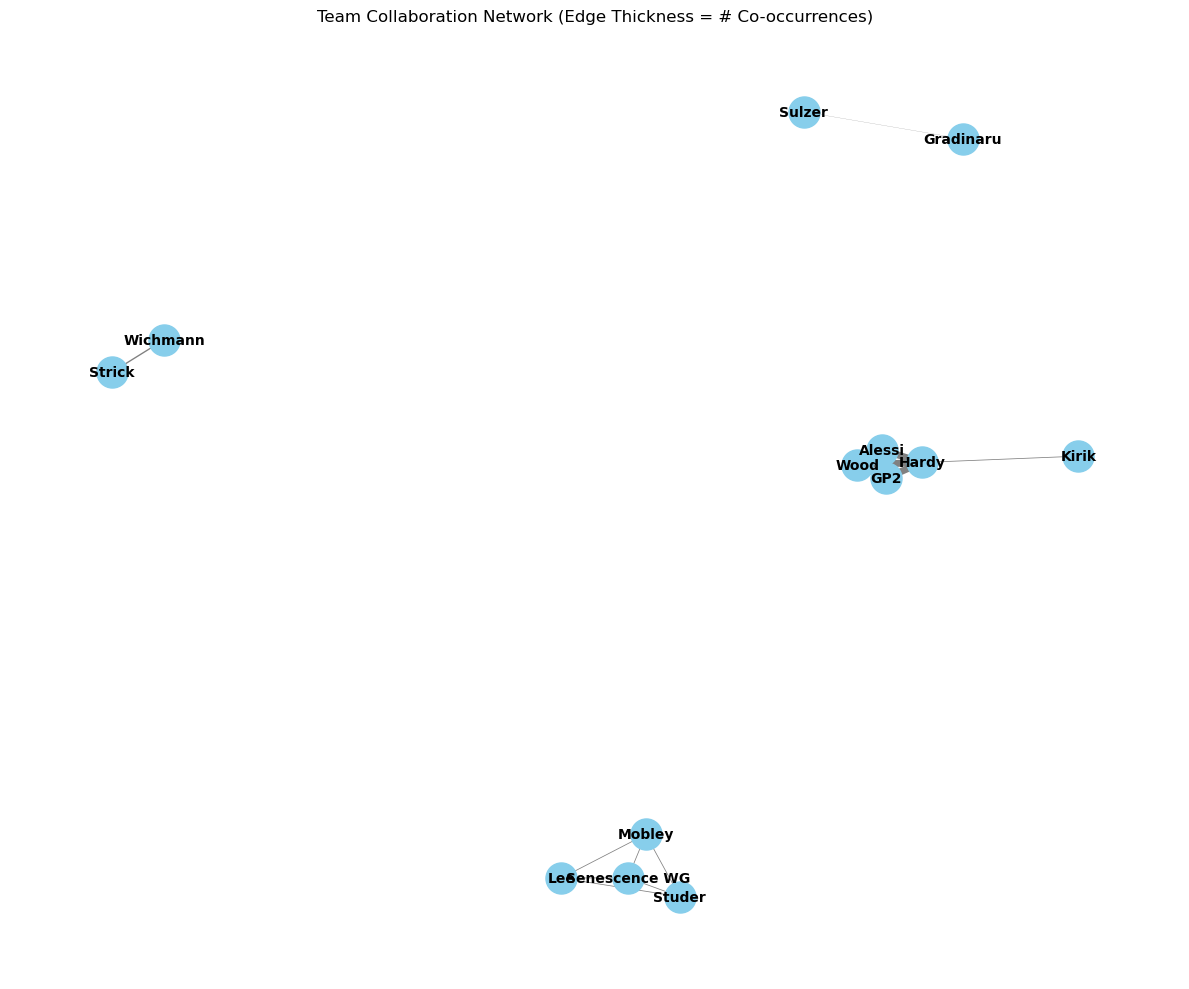

In [98]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Initialize an undirected graph
G = nx.Graph()

# Build edges with weight counting
edge_counter = Counter()

for team_list in pub_tracker_network["cleaned_team_list"].dropna():
    if len(team_list) < 2:
        continue  # Need at least 2 to form an edge
    for combo in combinations(sorted(set(team_list)), 2):  # prevent self-edges and duplicates
        edge_counter[combo] += 1

# Add edges and weights to the graph
for (team1, team2), weight in edge_counter.items():
    G.add_edge(team1, team2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G, seed=42, k=0.9, iterations=100)


# Extract edge weights
edges = G.edges(data=True)
weights = [data["weight"] for _, _, data in edges]

# Normalize edge thickness for better visual scaling
max_weight = max(weights) if weights else 1
scaled_weights = [w / max_weight * 5 for w in weights]  # scale thickness up to 5

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=scaled_weights, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Team Collaboration Network (Edge Thickness = # Co-occurrences)")
plt.axis("off")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25484\3380357830.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(communities))


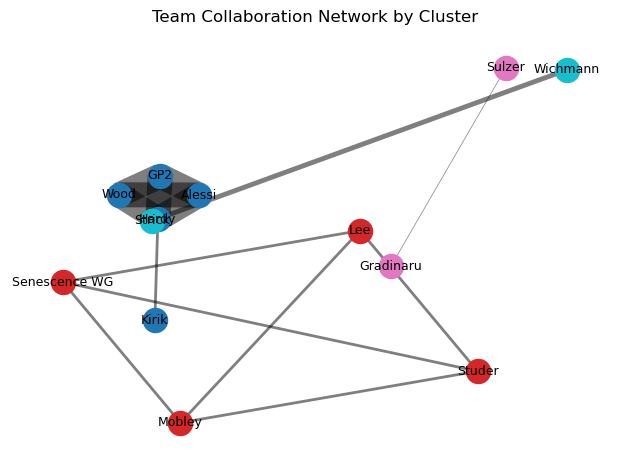

In [99]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm
import itertools

# Detect communities (clusters)
communities = list(greedy_modularity_communities(G))
community_map = {node: i for i, community in enumerate(communities) for node in community}

# Create layout: one for clusters, one for nodes inside clusters
cluster_layout = nx.spring_layout(
    G, 
    k=1.5,  # Spread clusters farther apart
    iterations=50,
    seed=42
)

# Adjust positions of nodes within each cluster
pos = {}
for i, community in enumerate(communities):
    # Create subgraph for this community
    subgraph = G.subgraph(community)
    # Local layout for this cluster
    sub_pos = nx.spring_layout(subgraph, k=0.3, seed=i)
    
    # Offset to position the whole cluster based on global cluster layout
    cluster_center = cluster_layout[list(community)[0]]
    for node in subgraph.nodes():
        pos[node] = sub_pos[node] + cluster_center

# Draw edges with weights
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]
nx.draw_networkx_edges(G, pos, width=[w * 0.5 for w in weights], alpha=0.5)

# Color by cluster
colors = cm.get_cmap('tab10', len(communities))
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=list(community),
        node_color=[colors(i)],
        label=f'Cluster {i}',
        node_size=300
    )

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=9)

plt.axis('off')
plt.title("Team Collaboration Network by Cluster")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25484\145311825.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(communities))


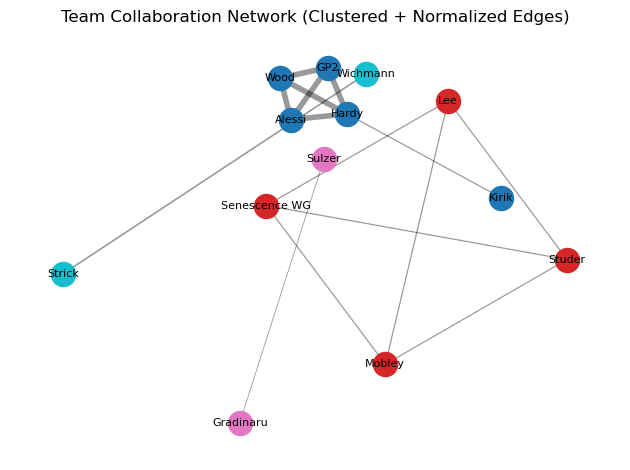

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm
import numpy as np

# Detect clusters (communities)
communities = list(greedy_modularity_communities(G))
community_map = {node: i for i, community in enumerate(communities) for node in community}

# Global cluster layout
cluster_centers = nx.spring_layout(
    nx.Graph([(i, j) for i in range(len(communities)) for j in range(i+1, len(communities))]),
    k=3.0, seed=42  # spread clusters apart
)

# Local layout for each cluster
pos = {}
scale = 1.5  # spacing within clusters
for i, community in enumerate(communities):
    subgraph = G.subgraph(community)
    sub_pos = nx.spring_layout(subgraph, k=0.5, seed=i)
    cluster_center = cluster_centers[i]

    for node in subgraph.nodes():
        offset = np.array(sub_pos[node]) * scale
        pos[node] = cluster_center + offset

# Normalize edge weights to avoid overly thick lines
edges = G.edges(data=True)
all_weights = [d['weight'] for (_, _, d) in edges]
max_weight = max(all_weights) if all_weights else 1
min_line_width = 0.5
max_line_width = 4.0
normalized_weights = [
    min_line_width + (w / max_weight) * (max_line_width - min_line_width)
    for w in all_weights
]

# Draw edges
nx.draw_networkx_edges(G, pos, width=normalized_weights, alpha=0.4)

# Color nodes by community
colors = cm.get_cmap('tab10', len(communities))
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=list(community),
        node_color=[colors(i)],
        label=f'Cluster {i}',
        node_size=300
    )

# Labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off')
plt.title("Team Collaboration Network (Clustered + Normalized Edges)")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25484\3866216464.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', num_clusters)


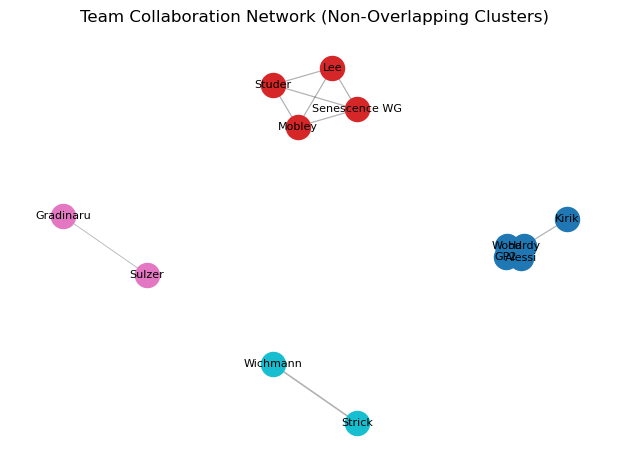

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm

# Detect communities
communities = list(greedy_modularity_communities(G))

# Normalize edge weights
all_weights = [d['weight'] for _, _, d in G.edges(data=True)]
max_weight = max(all_weights) if all_weights else 1
min_line_width = 0.5
max_line_width = 4.0
edge_widths = [
    min_line_width + (d['weight'] / max_weight) * (max_line_width - min_line_width)
    for _, _, d in G.edges(data=True)
]

# Assign fixed cluster centers on a circle
num_clusters = len(communities)
angle_step = 2 * np.pi / num_clusters
radius = 10
cluster_centers = {
    i: np.array([np.cos(i * angle_step), np.sin(i * angle_step)]) * radius
    for i in range(num_clusters)
}

# Position nodes
pos = {}
scale = 2.0  # adjust to control spacing within clusters
for i, community in enumerate(communities):
    subgraph = G.subgraph(community)
    sub_pos = nx.spring_layout(subgraph, seed=42)
    cluster_center = cluster_centers[i]
    for node, p in sub_pos.items():
        pos[node] = cluster_center + scale * np.array(p)

# Draw edges with normalized widths
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3)

# Draw nodes by cluster
cmap = cm.get_cmap('tab10', num_clusters)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=list(community),
        node_color=[cmap(i)],
        node_size=300,
        label=f'Cluster {i}'
    )

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Team Collaboration Network (Non-Overlapping Clusters)")
plt.axis("off")
plt.tight_layout()
plt.show()


SUCCESS - Network of Teams working together (based on given teams column in pub_tracker data)

C:\Users\User\AppData\Local\Temp\ipykernel_25484\2378107406.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', num_clusters)


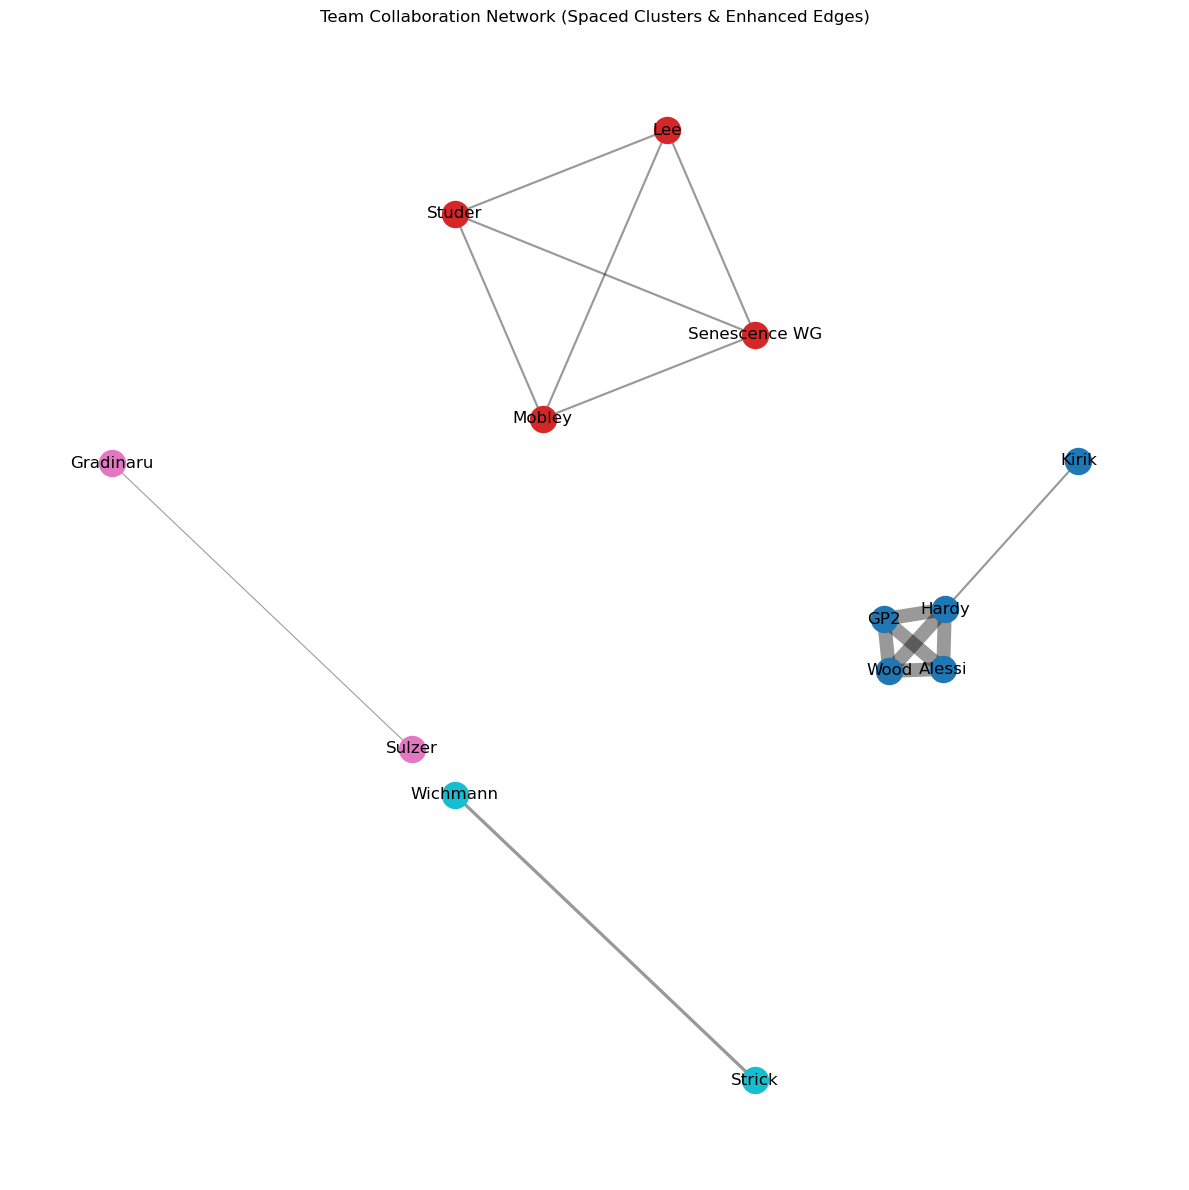

In [107]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm

# --- Detect communities ---
communities = list(greedy_modularity_communities(G))

# --- Normalize and scale edge weights ---
all_weights = [d['weight'] for _, _, d in G.edges(data=True)]
max_weight = max(all_weights) if all_weights else 1

# Make edge width reflect strength more dramatically
min_line_width = 0.5
max_line_width = 10
edge_widths = [
    min_line_width + (d['weight'] / max_weight) * (max_line_width - min_line_width)
    for _, _, d in G.edges(data=True)
]

# --- Assign fixed centers to avoid overlap ---
num_clusters = len(communities)
angle_step = 2 * np.pi / num_clusters
radius = 8
cluster_centers = {
    i: np.array([np.cos(i * angle_step), np.sin(i * angle_step)]) * radius
    for i in range(num_clusters)
}

# --- Compute positions with greater spread ---
pos = {}
scale = 3.5  # Increase this to spread nodes *within* clusters more
for i, community in enumerate(communities):
    subgraph = G.subgraph(community)
    sub_pos = nx.spring_layout(subgraph, seed=42, k=0.5)  # lower k = tighter spacing
    cluster_center = cluster_centers[i]
    for node, p in sub_pos.items():
        pos[node] = cluster_center + scale * np.array(p)

# --- Draw network ---
plt.figure(figsize=(12, 12))

# Draw edges with new width scale
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.4)

# Draw nodes by cluster
cmap = cm.get_cmap('tab10', num_clusters)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=list(community),
        node_color=[cmap(i)],
        node_size=350,
        label=f'Cluster {i}'
    )

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Team Collaboration Network (Spaced Clusters & Enhanced Edges)")
plt.axis("off")
plt.tight_layout()
plt.show()
